# <div align="left" style="font-weight: bold">Predict Potential Business Services in Vietnam</div>
<div align="left" style="font-weight: normal">Le Huy Hoang</div>
<div align="left" style="font-weight: normal">June 27, 2021</div>

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## 1. Introduction <a name="introduction"></a>

### 1.1 Background
<div style="text-align: justify">
    Vietnam is a country in SouthEast Asia  with a population of  over 96 millions.<br>
    In recent decades, thanks to the reforms in economy & politics, the country has<br>
    transformed from one of the poorest nations into a lower middle-income country.<br>
    <br>
    Rapid urbanisation and the emerging of middle class make  the country become<br>
    a very attractive investment destination, especially its major cities like Hanoi,<br>
    or Ho Chi Minh.<br>
</div>

### 1.2 Business Problem 
<div style="text-align: justify">
    To make investment decision, investors will have to figure out that in the near future,<br>
    which types of business will have more room to grow, hence, be more profitable.<br>
    <br>
    Based on the fact that countries in East and Southeast Asia that were heavily influenced<br>
    by Chinese culture, their development directions may share a lot of similarities.<br>
    This aspect could be ultilized to resolve the business problem.<br>
    <br>
    In the project, modern cities in China, and Singapore will be analyzed, then common characteristics<br>
    in their structures will be used to predict the most potential business services in Vietnam.<br>
    
</div>

### 1.3 Stakeholders
<div style="text-align: justify">
    The work would be valuable for investors who are looking for business opportunities<br>
    in Vietnam, and urban planners to optimize the effectiveness of land use and infrastructure.<br>
</div>

## 2. Data  <a name="data"></a>

Candidates for modern cities in East and Southeast Asia
* **Beijing, China**
* **Shanghai, China**
* **Singapore**

And **Hanoi, Vietnam** will be selected to evaluate the prediction.

### 2.1 Beijing, China

#### Get the list of divisions in Beijing from <a href="https://en.wikipedia.org/wiki/Beijing">Wikipedia</a>

In [7]:
import re
import requests

url_beijing = 'https://en.wikipedia.org/wiki/List_of_administrative_divisions_of_Beijing'

wiki_beijing = requests.get(url_beijing)

from bs4 import BeautifulSoup
soup_beijing = BeautifulSoup(wiki_beijing.content, 'html.parser')
tables_beijing = soup_beijing.findAll('table')

table_districts_beijing = tables_beijing[3]
cell_districts_beijing = table_districts_beijing.findAll('td')
link_districts_beijing = cell_districts_beijing[0].findAll('a')

districts_beijing = []
for ld in link_districts_beijing:
    if ('District' in ld['title']):
        tmp = re.sub(r'\s*District\s*', '', ld['title'])
        
    if ('Beijing' not in tmp):
        districts_beijing.append(tmp + ', Beijing')
    else:
        districts_beijing.append(tmp)

print('Number of divisions in Beijing, China:', len(districts_beijing))

#### Get locations of the districts from <a href="https://www.openstreetmap.org/">OpenStreetMap</a> using <a href="https://geopy.readthedocs.io/en/stable/#nominatim">GeoPy Library</a>

In [9]:
import pandas as pd
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_explorer")

def getLocations(addrs):
    dct = {}
    dct['Area'] = []
    dct['Latitude'] = []
    dct['Longitude'] = []
    for addr in addrs:
        loc = geolocator.geocode(addr)
        if (loc is None):
            print(addr + ': no information!')
        else:
            dct['Area'].append(addr)
            dct['Latitude'].append(loc.latitude)
            dct['Longitude'].append(loc.longitude)
    df = pd.DataFrame(dct)
    return df

In [10]:
print('Locations of the divisions:')
df_beijing = getLocations(districts)
df_beijing.head()

,Area,Latitude,Longitude
0,"Dongcheng, Beijing",39.906217,116.391276
1,"Xicheng, Beijing",39.910867,116.359922
2,"Shijingshan, Beijing",39.904610,116.216797
3,"Chaoyang, Beijing",39.920450,116.436911
4,"Haidian, Beijing",39.958072,116.292405
5,"Fengtai, Beijing",39.857118,116.280417
6,"Shijingshan, Beijing",39.904610,116.216797
7,"Mentougou, Beijing",39.938998,116.094757
8,"Fangshan, Beijing",39.714532,115.860501
9,"Fangshan, Beijing",39.714532,115.860501


#### Query popular venues in the city from <a href="https://foursquare.com/">Foursquare Database</a>

Foursquare credential

In [11]:
import os
# Foursquare credentials have been stored in local environment variables
CLIENT_ID = os.environ['FOURSQUARE_CLIENT_ID'] 
CLIENT_SECRET = os.environ['FOURSQUARE_CLIENT_SECRET'] 
VERSION = '20180605' # Foursquare API version

URL to get recommended venues around a location

In [12]:
url_explore = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION
        )

In [13]:
# Areas with less than 10 venues will be ignored
minimum_number_of_venues = 10

# Function that query venues'information around input locations
def getNearbyVenues(names, latitudes, longitudes):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        parameters = {
            'll':'{},{}'.format(lat, lng),
            'radius':2000,
            'limit':50
        }
            
        # make the GET request
        results = requests.get(url_explore, params=parameters).json()["response"]['groups'][0]['items']
        if (0 >= len(results)):
            print('No venue found around', name, '(', lat, ',', lng, ')!!!')
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    nearby_venues_counts = nearby_venues['Area'].value_counts()
    areas_to_drop = []
    for area in nearby_venues_counts.index:
        if nearby_venues_counts[area] < minimum_number_of_venues:
            areas_to_drop.append(area)

    nearby_venues = nearby_venues[~nearby_venues['Area'] .isin(areas_to_drop)]
    
    return(nearby_venues)

In [14]:
beijing_venues = getNearbyVenues(
                names=df_beijing['Area'],
                latitudes=df_beijing['Latitude'],
                longitudes=df_beijing['Longitude']
              )

print('Number of venues:', len(beijing_venues))
beijing_venues.head()

No venue found around Fangshan, Beijing ( 39.7145318 , 115.86050079650428 )!!!
No venue found around Fangshan, Beijing ( 39.7145318 , 115.86050079650428 )!!!
Number of venues: 250


,Area,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Dongcheng, Beijing",39.906217,116.391276,端门,39.908694,116.391192,Historic Site
1,"Dongcheng, Beijing",39.906217,116.391276,Gate of Supreme Harmony (太和门),39.913719,116.390880,Historic Site
2,"Dongcheng, Beijing",39.906217,116.391276,Zhongshan Park (Zhongshan Park 中山公园),39.908765,116.388602,Park
3,"Dongcheng, Beijing",39.906217,116.391276,Lost Heaven 花马天堂,39.900272,116.395612,Yunnan Restaurant
4,"Dongcheng, Beijing",39.906217,116.391276,中山音乐堂 Forbidden City Concert Hall,39.909374,116.389439,Concert Hall


### 2.2 **Shanghai, China**

#### Get the list of divisions in Shanghai from <a href="https://en.wikipedia.org/wiki/List_of_administrative_divisions_of_Shanghai">Wikipedia</a>

In [15]:
url_shanghai = 'https://en.wikipedia.org/wiki/List_of_administrative_divisions_of_Shanghai'
wiki_shanghai = requests.get(url_shanghai)

soup_shanghai = BeautifulSoup(wiki_shanghai.content, 'html.parser')
tables_shanghai = soup_shanghai.findAll('table')

table_districts_shanghai = tables_shanghai[2]
cell_districts_shanghai = table_districts_shanghai.findAll('td')
link_districts_shanghai = cell_districts_shanghai[0].findAll('a')

districts_shanghai = []
for ld in link_districts_shanghai:
    tmp = re.sub(r'\s*District\s*', '', ld['title'])

    if ('Shanghai' not in tmp):
        tmp += ', Shanghai'
    
    if (tmp not in districts_shanghai):
        districts_shanghai.append(tmp)

print('Number of divisions in Shanghai, China:', len(districts_shanghai))

Number of divisions in Shanghai, China: 16


#### Get locations of the districts from <a href="https://www.openstreetmap.org/">OpenStreetMap</a> using <a href="https://geopy.readthedocs.io/en/stable/#nominatim">GeoPy Library</a>

In [17]:
print('Locations of the divisions:')
df_shanghai = getLocations(districts_shanghai)
df_shanghai.head()

Locations of the divisions:


,Area,Latitude,Longitude
0,"Huangpu, Shanghai",31.232276,121.469207
1,"Xuhui, Shanghai",31.163698,121.427994
2,"Changning, Shanghai",31.209276,121.389986
3,"Jing'an, Shanghai",31.229776,121.443060
4,"Putuo, Shanghai",31.251326,121.391229


#### Query popular venues in the city from <a href="https://foursquare.com/">Foursquare Database</a>

In [18]:
shanghai_venues = getNearbyVenues(
                names=df_shanghai['Area'],
                latitudes=df_shanghai['Latitude'],
                longitudes=df_shanghai['Longitude']
              )

print('Number of venues:', len(shanghai_venues))
shanghai_venues.head()

No venue found around Chongming, Shanghai ( 31.6313393 , 121.5337768 )!!!
Number of venues: 414


,Area,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Huangpu, Shanghai",31.232276,121.469207,Shanghai Grand Theater (上海大剧院),31.231030,121.467263,Theater
1,"Huangpu, Shanghai",31.232276,121.469207,Le Royal Club Lounge,31.236404,121.471364,Lounge
2,"Huangpu, Shanghai",31.232276,121.469207,Lobby Bar @ 38th floor - JW Marriott,31.232421,121.465553,Hotel Bar
3,"Huangpu, Shanghai",31.232276,121.469207,JW Marriott Hotel Shanghai at Tomorrow Square ...,31.232216,121.465260,Hotel
4,"Huangpu, Shanghai",31.232276,121.469207,Jing'an Sculpture Park (静安雕塑公园),31.234794,121.463911,Sculpture Garden


### 2.3 **Singapore**

#### Get the list of divisions in Singapore from <a href="https://www.mingproperty.sg/singapore-district-code/">District Code and District Map of Singapore</a>

In [19]:
url_singapore = 'https://www.mingproperty.sg/singapore-district-code/'
wiki_singapore = requests.get(url_singapore)
soup_singapore = BeautifulSoup(wiki_singapore.content, 'html.parser')

tables_singapore = soup_singapore.findAll('table')
rows_singapore = tables_singapore[1].findAll('tr')

districts_singapore = []

for row in rows_singapore[1:]:
    cells = row.findAll('td')
    tmp = cells[2].text.split(',')[0].strip()

    if ('Singapore' not in tmp):
        districts_singapore.append(tmp + ', Singapore')
    else:
        districts_singapore.append(tmp)

print('Number of divisions in Singapore:', len(districts_singapore))

Number of divisions in Singapore: 28


#### Get locations of the districts from <a href="https://www.openstreetmap.org/">OpenStreetMap</a> using <a href="https://geopy.readthedocs.io/en/stable/#nominatim">GeoPy Library</a>

In [20]:
print('Locations of the divisions:')
df_singapore = getLocations(districts_singapore)
df_singapore.head()

Locations of the divisions:


,Area,Latitude,Longitude
0,"Raffles Place, Singapore",1.283542,103.851460
1,"Anson, Singapore",1.273796,103.843473
2,"Queenstown, Singapore",1.294623,103.806037
3,"Telok Blangah, Singapore",1.271020,103.809695
4,"Pasir Panjang, Singapore",1.276201,103.791476


#### Query popular venues in the city from <a href="https://foursquare.com/">Foursquare Database</a>

In [21]:
singapore_venues = getNearbyVenues(
                names=df_singapore['Area'],
                latitudes=df_singapore['Latitude'],
                longitudes=df_singapore['Longitude']
              )

print('Number of venues:', len(singapore_venues))
singapore_venues.head()

Number of venues: 1300


,Area,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Raffles Place, Singapore",1.283542,103.85146,The Fullerton Bay Hotel,1.283878,103.853314,Hotel
1,"Raffles Place, Singapore",1.283542,103.85146,Ritual Gym,1.285965,103.848651,Gym
2,"Raffles Place, Singapore",1.283542,103.85146,The Fullerton Hotel,1.286200,103.852980,Hotel
3,"Raffles Place, Singapore",1.283542,103.85146,Amoy Hotel,1.283118,103.848539,Hotel
4,"Raffles Place, Singapore",1.283542,103.85146,Sabaai Sabaai Traditional Thai Massage,1.286964,103.849512,Massage Studio


### 2.4 **Hanoi**

#### Get the list of divisions in Singapore from <a href="https://www.mingproperty.sg/singapore-district-code/">District Code and District Map of Singapore</a>

In [68]:
url_hanoi = 'https://en.wikipedia.org/wiki/Hanoi#List_of_local_government_divisions'
wiki_hanoi = requests.get(url_hanoi)
sp_hanoi = BeautifulSoup(wiki_hanoi.content, 'html.parser')


tables_hanoi = sp_hanoi.findAll('table')
table_district_hanoi = tables_hanoi[22]

cell_districts_hanoi = table_district_hanoi.findAll('td')
link_districts_hanoi = cell_districts_hanoi[0].findAll('a')

districts_hanoi = []

for ld in link_districts_hanoi:
    tmp = re.sub(r'\s*District\s*', '', ld['title'])

    if ('Hanoi' not in tmp):
        tmp += ', Hanoi'
    
    if (tmp not in districts_hanoi):
        districts_hanoi.append(tmp)

# Reduce the scope to 12 urban districts only
districts_hanoi = districts_hanoi[0:12]

print('Number of divisions in Hanoi, Vietnam:', len(districts_hanoi))

Number of divisions in Hanoi, Vietnam: 12


#### Get locations of the districts from <a href="https://www.openstreetmap.org/">OpenStreetMap</a> using <a href="https://geopy.readthedocs.io/en/stable/#nominatim">GeoPy Library</a>

In [69]:
print('Locations of the divisions:')
df_hanoi = getLocations(districts_hanoi)
df_hanoi.head()

Locations of the divisions:


,Area,Latitude,Longitude
0,"Ba Đình, Hanoi",21.034075,105.814527
1,"Bắc Từ Liêm, Hanoi",21.069861,105.757339
2,"Cầu Giấy, Hanoi",21.029165,105.803438
3,"Đống Đa, Hanoi",21.012920,105.827196
4,"Hà Đông, Hanoi",20.970260,105.775001


#### Query popular venues in the city from <a href="https://foursquare.com/">Foursquare Database</a>

In [70]:
hanoi_venues = getNearbyVenues(
                names=df_hanoi['Area'],
                latitudes=df_hanoi['Latitude'],
                longitudes=df_hanoi['Longitude']
              )

print('Number of venues:', len(hanoi_venues))
hanoi_venues.head()

Number of venues: 377


,Area,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Ba Đình, Hanoi",21.034075,105.814527,Sky Walk Lotte Centre,21.032131,105.812428,Scenic Lookout
1,"Ba Đình, Hanoi",21.034075,105.814527,Polygon Music,21.029922,105.822862,Rock Club
2,"Ba Đình, Hanoi",21.034075,105.814527,Cup of Tea Cafe & Bistro,21.033084,105.810379,Tea Room
3,"Ba Đình, Hanoi",21.034075,105.814527,Carambola Cafe,21.033445,105.816124,Café
4,"Ba Đình, Hanoi",21.034075,105.814527,Bornga - Original Korean Taste,21.031512,105.812575,Korean Restaurant


## 3. Methodology <a name="methodology"></a>

## 4. Analysis <a name="analysis"></a>

### 4.1 Beijing

Before we could perform clustering, venues' information need to be encoded, and grouped

In [25]:
# Function to encode categories, and group venues based on the division area
def preparation(df_venues):
    # one hot encoding
    df_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

    # add postalcode column back to dataframe
    df_onehot['Area'] = df_venues['Area'] 

    # move Area column to the first column
    fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
    df_onehot = df_onehot[fixed_columns]

    df_grouped = df_onehot.groupby('Area').mean().reset_index()
    print('Grouped dimensions:', df_grouped.shape)
    return df_grouped

In [41]:
beijing_venues_grouped = preparation(beijing_venues)
beijing_venues_grouped.head()

Grouped dimensions: (7, 70)


,Area,American Restaurant,Art Museum,Asian Restaurant,Bakery,Bar,Big Box Store,Bookstore,Brewery,Bus Station,...,Szechuan Restaurant,Taiwanese Restaurant,Tea Room,Thai Restaurant,Tibetan Restaurant,Train Station,Turkish Restaurant,Vietnamese Restaurant,Yunnan Restaurant,Zhejiang Restaurant
0,"Changping, Beijing",0.00,0.083333,0.083333,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.083333,0.00,0.00,0.00,0.00
1,"Chaoyang, Beijing",0.00,0.000000,0.000000,0.02,0.02,0.00,0.0,0.02,0.0,...,0.02,0.00,0.00,0.02,0.02,0.000000,0.02,0.02,0.00,0.00
2,"Dongcheng, Beijing",0.02,0.000000,0.000000,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,0.00,0.02,0.00,0.00,0.000000,0.00,0.00,0.02,0.02
3,"Haidian, Beijing",0.02,0.000000,0.000000,0.00,0.00,0.02,0.0,0.00,0.0,...,0.00,0.02,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00
4,"Shijingshan, Beijing",0.00,0.000000,0.000000,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00


Determine the most common venues' categories in each area

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
import numpy as np

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    if (len(indicators) > ind):
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    else:
        columns.append('{}th Most Common Venue'.format(ind+1))

def get_sorted_df(df_grouped):
    # create a new dataframe
    df_sorted = pd.DataFrame(columns=columns)
    df_sorted['Area'] = df_grouped['Area']

    for ind in np.arange(df_grouped.shape[0]):
        df_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

    return df_sorted

In [42]:
beijing_venues_sorted = get_sorted_df(beijing_venues_grouped)
beijing_venues_sorted.head()

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Changping, Beijing",Chinese Restaurant,Jewelry Store,Park,Gift Shop,Clothing Store
1,"Chaoyang, Beijing",Hotel,Cocktail Bar,Japanese Restaurant,Chinese Restaurant,Shopping Mall
2,"Dongcheng, Beijing",Historic Site,Hotel,Coffee Shop,Park,Chinese Restaurant
3,"Haidian, Beijing",Fast Food Restaurant,Pizza Place,Hotel,Café,Coffee Shop
4,"Shijingshan, Beijing",Fast Food Restaurant,Hotel,Shopping Mall,Coffee Shop,Mongolian Restaurant


Find the best number of clusters

In [31]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

random_states = list(range(0, 10))

def inspect_k_means(df_grouped, kmin = 2, kmax = 8):
    df_grouped_clustering = df_grouped.drop('Area', 1)

    cluster_numbers = np.arange(kmin, kmax + 1)
    scores = np.zeros(kmax + 1)
    
    for n in cluster_numbers:
        for s in random_states:
            kmeans = KMeans(n_clusters=n, random_state=s).fit(df_grouped_clustering)
            scores[n] += silhouette_score(df_grouped_clustering, kmeans.labels_, metric='euclidean')
    
    scores = scores/len(random_states)
    
    fig, ax = plt.subplots()
    ax.plot(scores)
    ax.set_xlabel('Number of clusters')
    ax.set_xlim(cluster_numbers[0], cluster_numbers[-1])
    ax.set_ylabel('Silhouette Score')
    ax.set_title("Clustering Evaluation")

    plt.show()

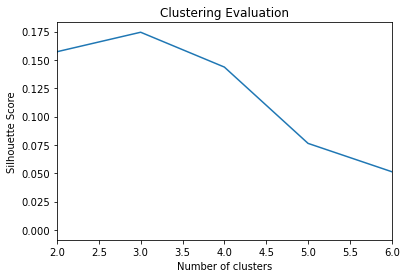

In [32]:
inspect_k_means(beijing_venues_grouped, kmax = beijing_venues_grouped.shape[0] - 1)

Let's perform K-means clustering with 3 clusters

In [33]:
def cluster(df_grouped, k=3):
    df_grouped_clustering = df_grouped.drop('Area', 1)
    best_random_state = 0
    best_silhouette_score = -1
    for s in random_states:
        kmeans = KMeans(n_clusters=k, random_state=s).fit(df_grouped_clustering)
        tmp = silhouette_score(df_grouped_clustering, kmeans.labels_, metric='euclidean')
        if (best_silhouette_score < tmp):
            best_silhouette_score = tmp
            best_random_state = s
    
    kmeans = KMeans(n_clusters=k, random_state=best_random_state).fit(df_grouped_clustering)
    print('Grouped data into', k, 'clusters -> Silhouette score:', silhouette_score(df_grouped_clustering, kmeans.labels_, metric='euclidean'))
    return kmeans.labels_

In [43]:
beijing_venues_labels = cluster(beijing_venues_grouped, k = 3)

Grouped data into 3 clusters -> Silhouette score: 0.17441085273418297


Now, we could merge clustering results with the venues' information

In [44]:
beijing_venues_sorted.insert(0, 'Cluster Labels', beijing_venues_labels)
beijing_venues_merged = df_beijing
beijing_venues_merged = beijing_venues_merged.join(beijing_venues_sorted.set_index('Area'), on='Area')
beijing_venues_merged.drop(beijing_venues_merged[beijing_venues_merged['Cluster Labels'].isnull()].index, inplace=True)
beijing_venues_merged['Cluster Labels'] = beijing_venues_merged['Cluster Labels'].astype('int32')
beijing_venues_merged

,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Dongcheng, Beijing",39.906217,116.391276,2,Historic Site,Hotel,Coffee Shop,Park,Chinese Restaurant
1,"Xicheng, Beijing",39.910867,116.359922,0,Coffee Shop,Fast Food Restaurant,Hotel,Department Store,Shopping Mall
2,"Shijingshan, Beijing",39.904610,116.216797,0,Fast Food Restaurant,Hotel,Shopping Mall,Coffee Shop,Mongolian Restaurant
3,"Chaoyang, Beijing",39.920450,116.436911,2,Hotel,Cocktail Bar,Japanese Restaurant,Chinese Restaurant,Shopping Mall
4,"Haidian, Beijing",39.958072,116.292405,0,Fast Food Restaurant,Pizza Place,Hotel,Café,Coffee Shop
6,"Shijingshan, Beijing",39.904610,116.216797,0,Fast Food Restaurant,Hotel,Shopping Mall,Coffee Shop,Mongolian Restaurant
11,"Changping, Beijing",40.219646,116.225091,1,Chinese Restaurant,Jewelry Store,Park,Gift Shop,Clothing Store
15,"Yanqing, Beijing",40.457305,115.978508,2,Hotel,Park,Campground,Chinese Restaurant,Korean Restaurant


Let's visualize the clustering results on the city map

In [36]:
import folium
from geopy.geocoders import Nominatim
from matplotlib import cm, colors

geolocator = Nominatim(user_agent="my_explorer")

def visualize_clusters(central_address, df_clustered, labels):
    location = geolocator.geocode(central_address)
    latitude = location.latitude
    longitude = location.longitude

    # create map
    map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

    # set color scheme for the clusters
    x = np.arange(len(labels))
    ys = [i + x + (i*x)**2 for i in range(len(labels))]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
    i = 0
    markers_colors = []
    for lat, lon, poi, cluster in zip(df_clustered['Latitude'], df_clustered['Longitude'], df_clustered['Area'], df_clustered['Cluster Labels']):
        label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
        map_clusters.add_child(
            folium.CircleMarker(
                [lat, lon],
                radius=5,
                popup=label,
                color=rainbow[cluster-1],
                fill=True,
                fill_color=rainbow[cluster-1],
                fill_opacity=0.7
            )
        )
        i += 1
    
    return map_clusters

In [37]:
visualize_clusters('Beijing, China', beijing_venues_merged, beijing_venues_labels)

### Let's apply the same procedures with other cities

### 4.2 Shanghai

Encode and group data

In [38]:
shanghai_venues_grouped = preparation(shanghai_venues)
shanghai_venues_grouped.head()

Grouped dimensions: (12, 106)


,Area,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,Bakery,Bar,Big Box Store,Bistro,...,Toll Booth,Train Station,Vegetarian / Vegan Restaurant,Video Store,Waterfront,Wine Shop,Xinjiang Restaurant,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant
0,"Baoshan, Shanghai",0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0
1,"Changning, Shanghai",0.00,0.00,0.0,0.0,0.00,0.02,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.02,0.0,0.00,0.0
2,"Hongkou, Shanghai",0.00,0.02,0.0,0.0,0.02,0.00,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0
3,"Huangpu, Shanghai",0.02,0.00,0.0,0.0,0.04,0.00,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.02,0.0,0.00,0.0,0.02,0.0
4,"Jiading, Shanghai",0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.083333,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0


Determine the most common venues' categories in each area

In [39]:
shanghai_venues_sorted = get_sorted_df(shanghai_venues_grouped)
shanghai_venues_sorted.head()

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Baoshan, Shanghai",Shopping Mall,Port,Boat or Ferry,Hotel,Fast Food Restaurant
1,"Changning, Shanghai",Coffee Shop,Japanese Restaurant,Fast Food Restaurant,Chinese Restaurant,Korean Restaurant
2,"Hongkou, Shanghai",Coffee Shop,Fast Food Restaurant,Hotel,Park,Hotel Bar
3,"Huangpu, Shanghai",Hotel,French Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant
4,"Jiading, Shanghai",Hotel,Garden,Food,Convenience Store,Japanese Restaurant


Find the best number of clusters

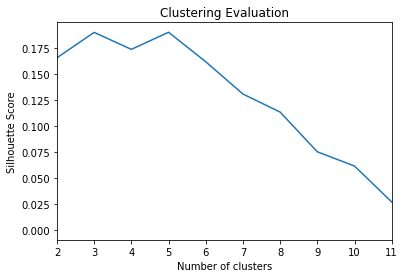

In [40]:
inspect_k_means(shanghai_venues_grouped, kmax = shanghai_venues_grouped.shape[0] - 1)

Let's perform K-means clustering with 5 clusters

In [45]:
shanghai_venues_labels = cluster(shanghai_venues_grouped, k = 5)

Grouped data into 5 clusters -> Silhouette score: 0.19045214996075088


Now, we could merge clustering results with the venues' information

In [46]:
shanghai_venues_sorted.insert(0, 'Cluster Labels', shanghai_venues_labels)
shanghai_venues_merged = df_shanghai
shanghai_venues_merged = shanghai_venues_merged.join(shanghai_venues_sorted.set_index('Area'), on='Area')
shanghai_venues_merged.drop(shanghai_venues_merged[shanghai_venues_merged['Cluster Labels'].isnull()].index, inplace=True)
shanghai_venues_merged['Cluster Labels'] = shanghai_venues_merged['Cluster Labels'].astype('int32')
shanghai_venues_merged

,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Huangpu, Shanghai",31.232276,121.469207,4,Hotel,French Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant
1,"Xuhui, Shanghai",31.163698,121.427994,2,Fast Food Restaurant,Coffee Shop,Hotel,Chinese Restaurant,Shopping Mall
2,"Changning, Shanghai",31.209276,121.389986,0,Coffee Shop,Japanese Restaurant,Fast Food Restaurant,Chinese Restaurant,Korean Restaurant
3,"Jing'an, Shanghai",31.229776,121.443060,4,Hotel,Dumpling Restaurant,Hotpot Restaurant,Coffee Shop,Spa
4,"Putuo, Shanghai",31.251326,121.391229,2,Fast Food Restaurant,Hotel,Metro Station,Shopping Mall,Coffee Shop
5,"Hongkou, Shanghai",31.266703,121.501751,0,Coffee Shop,Fast Food Restaurant,Hotel,Park,Hotel Bar
6,"Yangpu, Shanghai",31.262011,121.521430,0,Coffee Shop,Hotel,Fast Food Restaurant,Chinese Restaurant,Plaza
7,"Pudong, Shanghai",31.221783,121.538740,0,Coffee Shop,Hotel,Italian Restaurant,Fast Food Restaurant,Pub
8,"Baoshan, Shanghai",31.406634,121.485158,3,Shopping Mall,Port,Boat or Ferry,Hotel,Fast Food Restaurant
9,"Minhang, Shanghai",31.114767,121.376943,0,Coffee Shop,Fast Food Restaurant,Shopping Mall,Zhejiang Restaurant,Burger Joint


Let's visualize the clustering results on the city map

In [47]:
visualize_clusters('Shanghai, China', shanghai_venues_merged, shanghai_venues_labels)

### 4.3 Singapore

Encode and group data

In [64]:
singapore_venues_grouped = preparation(singapore_venues)
singapore_venues_grouped.head()

Grouped dimensions: (28, 197)


,Area,Airport,Airport Lounge,Airport Service,American Restaurant,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,...,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Yoga Studio,Zoo Exhibit
0,"Anson, Singapore",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.02,...,0.00,0.00,0.00,0.0,0.0,0.02,0.04,0.00,0.02,0.0
1,"Ardmore, Singapore",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.00,...,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.02,0.0
2,"Balestier, Singapore",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.00,...,0.00,0.00,0.02,0.0,0.0,0.00,0.00,0.00,0.00,0.0
3,"Bedok, Singapore",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.00,...,0.00,0.02,0.00,0.0,0.0,0.00,0.00,0.02,0.00,0.0
4,"Bishan, Singapore",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.00,...,0.02,0.02,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0


Determine the most common venues' categories in each area

In [65]:
singapore_venues_sorted = get_sorted_df(singapore_venues_grouped)
singapore_venues_sorted.head()

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Anson, Singapore",Japanese Restaurant,Coffee Shop,Spanish Restaurant,Gym / Fitness Center,Wine Bar
1,"Ardmore, Singapore",Hotel,Bakery,Japanese Restaurant,Sushi Restaurant,Coffee Shop
2,"Balestier, Singapore",Bakery,Asian Restaurant,Supermarket,Coffee Shop,Indian Restaurant
3,"Bedok, Singapore",Chinese Restaurant,Food Court,Coffee Shop,Asian Restaurant,Café
4,"Bishan, Singapore",Food Court,Chinese Restaurant,Coffee Shop,Asian Restaurant,BBQ Joint


Find the best number of clusters

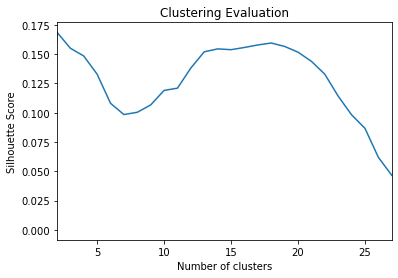

In [50]:
inspect_k_means(singapore_venues_grouped, kmax = singapore_venues_grouped.shape[0] - 1)

Let's perform K-means clustering with 13 clusters

In [66]:
singapore_venues_labels = cluster(singapore_venues_grouped, k = 13)

Grouped data into 13 clusters -> Silhouette score: 0.1661054296588683


Now, we could merge clustering results with the venues' information

In [67]:
singapore_venues_sorted.insert(0, 'Cluster Labels', singapore_venues_labels)
singapore_venues_merged = df_singapore
singapore_venues_merged = singapore_venues_merged.join(singapore_venues_sorted.set_index('Area'), on='Area')
# singapore_venues_merged.drop(singapore_venues_merged[shanghai_venues_merged['Cluster Labels'].isnull()].index, inplace=True)
singapore_venues_merged['Cluster Labels'] = singapore_venues_merged['Cluster Labels'].astype('int32')
singapore_venues_merged

,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Raffles Place, Singapore",1.283542,103.851460,4,Hotel,Waterfront,Performing Arts Venue,Boutique,Wine Bar
1,"Anson, Singapore",1.273796,103.843473,9,Japanese Restaurant,Coffee Shop,Spanish Restaurant,Gym / Fitness Center,Wine Bar
2,"Queenstown, Singapore",1.294623,103.806037,6,Chinese Restaurant,Park,Café,Food Court,Asian Restaurant
3,"Telok Blangah, Singapore",1.271020,103.809695,0,Park,Trail,Scenic Lookout,Clothing Store,Shopping Mall
4,"Pasir Panjang, Singapore",1.276201,103.791476,1,Thai Restaurant,Coffee Shop,Chinese Restaurant,Seafood Restaurant,Cocktail Bar
5,"High Street, Singapore",1.290383,103.849732,4,Hotel,Japanese Restaurant,Waterfront,Performing Arts Venue,Park
6,"Middle Road, Singapore",1.298630,103.853861,12,Hotel,Café,Japanese Restaurant,Park,Whisky Bar
7,"Little India, Singapore",1.306843,103.849274,12,Hotel,Indian Restaurant,Café,Clothing Store,Japanese Restaurant
8,"Orchard, Singapore",1.303427,103.831342,2,Hotel,Bakery,Clothing Store,Japanese Restaurant,Sushi Restaurant
9,"Ardmore, Singapore",1.308984,103.828897,2,Hotel,Bakery,Japanese Restaurant,Sushi Restaurant,Coffee Shop


Let's visualize the clustering results on the city map

In [57]:
visualize_clusters('Singapore', singapore_venues_merged, singapore_venues_labels)

### 4.4 Hanoi, Vietnam

Encode and group data

In [71]:
hanoi_venues_grouped = preparation(hanoi_venues)
hanoi_venues_grouped.head()

Grouped dimensions: (9, 94)


,Area,Arepa Restaurant,Art Gallery,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,...,Thai Restaurant,Theater,Tiki Bar,Train Station,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Women's Store
0,"Ba Đình, Hanoi",0.00,0.02,0.0,0.000000,0.000000,0.000000,0.02,0.02,0.02,...,0.00,0.00,0.02,0.000000,0.0,0.02,0.080000,0.0,0.02,0.0
1,"Cầu Giấy, Hanoi",0.00,0.02,0.0,0.000000,0.000000,0.000000,0.00,0.02,0.00,...,0.00,0.00,0.02,0.000000,0.0,0.00,0.080000,0.0,0.02,0.0
2,"Hai Bà Trưng, Hanoi",0.02,0.00,0.0,0.000000,0.060000,0.000000,0.00,0.00,0.02,...,0.02,0.02,0.00,0.000000,0.0,0.02,0.240000,0.0,0.00,0.0
3,"Hoàn Kiếm, Hanoi",0.00,0.00,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.000000,0.0,0.02,0.200000,0.0,0.02,0.0
4,"Long Biên, Hanoi",0.00,0.00,0.0,0.095238,0.047619,0.047619,0.00,0.00,0.00,...,0.00,0.00,0.00,0.047619,0.0,0.00,0.142857,0.0,0.00,0.0


Determine the most common venues' categories in each area

In [72]:
hanoi_venues_sorted = get_sorted_df(hanoi_venues_grouped)
hanoi_venues_sorted.head()

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Ba Đình, Hanoi",Coffee Shop,Hotel,Vietnamese Restaurant,Café,Japanese Restaurant
1,"Cầu Giấy, Hanoi",Café,Japanese Restaurant,Vietnamese Restaurant,Coffee Shop,Korean Restaurant
2,"Hai Bà Trưng, Hanoi",Vietnamese Restaurant,Café,Japanese Restaurant,BBQ Joint,Coffee Shop
3,"Hoàn Kiếm, Hanoi",Hotel,Vietnamese Restaurant,Coffee Shop,Spa,Hostel
4,"Long Biên, Hanoi",Vietnamese Restaurant,Auto Garage,Shopping Mall,Bowling Alley,Market


Find the best number of clusters

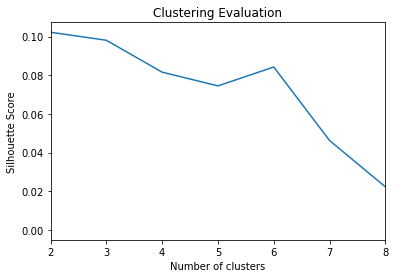

In [73]:
inspect_k_means(hanoi_venues_grouped, kmax = hanoi_venues_grouped.shape[0] - 1)

Let's perform K-means clustering with 6 clusters

In [74]:
hanoi_venues_labels = cluster(hanoi_venues_grouped, k = 6)

Grouped data into 6 clusters -> Silhouette score: 0.08722318267859647


Now, we could merge clustering results with the venues' information

In [75]:
hanoi_venues_sorted.insert(0, 'Cluster Labels', hanoi_venues_labels)
hanoi_venues_merged = df_hanoi
hanoi_venues_merged = hanoi_venues_merged.join(hanoi_venues_sorted.set_index('Area'), on='Area')
hanoi_venues_merged.drop(hanoi_venues_merged[hanoi_venues_merged['Cluster Labels'].isnull()].index, inplace=True)
hanoi_venues_merged['Cluster Labels'] = hanoi_venues_merged['Cluster Labels'].astype('int32')
hanoi_venues_merged

,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Ba Đình, Hanoi",21.034075,105.814527,2,Coffee Shop,Hotel,Vietnamese Restaurant,Café,Japanese Restaurant
2,"Cầu Giấy, Hanoi",21.029165,105.803438,2,Café,Japanese Restaurant,Vietnamese Restaurant,Coffee Shop,Korean Restaurant
3,"Đống Đa, Hanoi",21.012920,105.827196,4,Vietnamese Restaurant,Coffee Shop,Café,Hotel,BBQ Joint
5,"Hai Bà Trưng, Hanoi",21.005970,105.857484,3,Vietnamese Restaurant,Café,Japanese Restaurant,BBQ Joint,Coffee Shop
6,"Hoàn Kiếm, Hanoi",21.028524,105.850716,0,Hotel,Vietnamese Restaurant,Coffee Shop,Spa,Hostel
8,"Long Biên, Hanoi",21.039341,105.892245,5,Vietnamese Restaurant,Auto Garage,Shopping Mall,Bowling Alley,Market
9,"Nam Từ Liêm, Hanoi",21.012846,105.760874,1,Café,Coffee Shop,Bakery,Stadium,Tea Room
10,"Tây Hồ, Hanoi",21.079042,105.815432,4,Noodle House,Vietnamese Restaurant,Bakery,Pastry Shop,Café
11,"Thanh Xuân, Hanoi",20.993687,105.814301,4,Coffee Shop,Multiplex,Bakery,Pizza Place,Beer Bar


Let's visualize the clustering results on the city map

In [76]:
visualize_clusters('Hanoi, Vietnam', hanoi_venues_merged, hanoi_venues_labels)

## 5. Results and Discussion <a name="results"></a>

## 6. Conclusion <a name="conclusion"></a>

## References
[1] https://www.worldbank.org/en/country/vietnam/overview<br>
[2] https://en.wikipedia.org/wiki/East_Asian_cultural_sphere<br>
